In [1]:
import numpy as np
import pandas as pd
import gc
import time
from pickle import dump
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.over_sampling import SMOTE 
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

In [2]:
X = pd.read_csv("X_clean.csv")
Y = pd.read_csv("Y_clean.csv")

In [3]:
Y = Y["TARGET"]

In [4]:
X.shape

(307507, 507)

In [6]:
Y.shape

(307507,)

In [7]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Select important features

In [8]:
from sklearn.linear_model import LogisticRegression, Perceptron
import lime
from lime import lime_tabular
import shap

In [9]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [10]:
# feature_importance_df = pd.DataFrame()
# feats = [f for f in X.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index', "Unnamed0"]]
# folds = StratifiedKFold(n_splits= 2, shuffle=True, random_state=1001)
# for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, Y_train)):
#     train_x, train_y = X_train[feats].iloc[train_idx], Y_train.iloc[train_idx]
#     valid_x, valid_y = X_train[feats].iloc[valid_idx], Y_train.iloc[valid_idx]

#     # LightGBM parameters found by Bayesian optimization
#     clf = LGBMClassifier(
#         nthread=4,
#         n_estimators=10000,
#         learning_rate=0.02,
#         num_leaves=34,
#         colsample_bytree=0.9497036,
#         subsample=0.8715623,
#         max_depth=8,
#         reg_alpha=0.041545473,
#         reg_lambda=0.0735294,
#         min_split_gain=0.0222415,
#         min_child_weight=39.3259775,
#         silent=-1,
#         verbose=-1, )

#     clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
#         eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)


'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	training's auc: 0.806492	training's binary_logloss: 0.232135	valid_1's auc: 0.765338	valid_1's binary_logloss: 0.244514
[400]	training's auc: 0.835157	training's binary_logloss: 0.220169	valid_1's auc: 0.773044	valid_1's binary_logloss: 0.241533
[600]	training's auc: 0.853455	training's binary_logloss: 0.21248	valid_1's auc: 0.775012	valid_1's binary_logloss: 0.240882
[800]	training's auc: 0.868937	training's binary_logloss: 0.205831	valid_1's auc: 0.77602	valid_1's binary_logloss: 0.240571
[1000]	training's auc: 0.882646	training's binary_logloss: 0.199644	valid_1's auc: 0.776257	valid_1's binary_logloss: 0.240534


'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[200]	training's auc: 0.803881	training's binary_logloss: 0.233025	valid_1's auc: 0.766513	valid_1's binary_logloss: 0.244112
[400]	training's auc: 0.832005	training's binary_logloss: 0.221444	valid_1's auc: 0.77491	valid_1's binary_logloss: 0.240856
[600]	training's auc: 0.851488	training's binary_logloss: 0.213416	valid_1's auc: 0.777031	valid_1's binary_logloss: 0.240141
[800]	training's auc: 0.867998	training's binary_logloss: 0.206324	valid_1's auc: 0.777947	valid_1's binary_logloss: 0.239891
[1000]	training's auc: 0.881688	training's binary_logloss: 0.200142	valid_1's auc: 0.778141	valid_1's binary_logloss: 0.239849
[1200]	training's auc: 0.894342	training's binary_logloss: 0.194143	valid_1's auc: 0.777847	valid_1's binary_logloss: 0.23996


In [11]:
oof_preds = np.zeros(X_train.shape[0])
sub_preds = np.zeros(X_test.shape[0])

In [12]:
oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
sub_preds += clf.predict_proba(X_test[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits # pas trop compris [:, 1]

fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
fold_importance_df["fold"] = n_fold + 1
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0) # pas trop compris
print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx]))) # pas trop compris

Fold  2 AUC : 0.778221


In [13]:
#oof_preds[valid_idx]

In [14]:
#sub_preds.tolist()

In [15]:
#fold_importance_df["feature"] = feats

In [16]:
#fold_importance_df["feature"]

In [17]:
#fold_importance_df["importance"]

In [18]:
feature_importance_df

,feature,importance,fold
0,CODE_GENDER,226,2
1,FLAG_OWN_CAR,139,2
2,FLAG_OWN_REALTY,4,2
3,CNT_CHILDREN,18,2
4,AMT_INCOME_TOTAL,139,2
...,...,...,...
502,INSTAL_AMT_PAYMENT_SUM,197,2
503,INSTAL_DAYS_ENTRY_PAYMENT_MAX,319,2
504,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,296,2
505,INSTAL_DAYS_ENTRY_PAYMENT_SUM,209,2


In [19]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index  # à expliquer
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')
    return best_features.sort_values(by="importance", ascending=False)

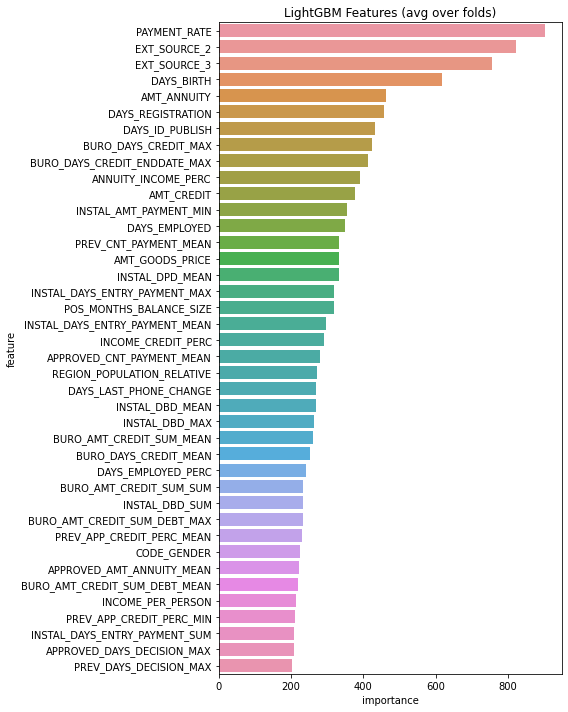

In [20]:
name_good_features = display_importances(feature_importance_df)

In [21]:
nb_features_to_keep = 100

In [22]:
features_useful = list(set(name_good_features[:nb_features_to_keep]["feature"].values))

In [23]:
features_useful

['CODE_GENDER',
 'APPROVED_AMT_ANNUITY_MEAN',
 'DAYS_BIRTH',
 'BURO_DAYS_CREDIT_MAX',
 'APPROVED_DAYS_DECISION_MAX',
 'PREV_CNT_PAYMENT_MEAN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'INCOME_PER_PERSON',
 'BURO_DAYS_CREDIT_ENDDATE_MAX',
 'AMT_CREDIT',
 'INSTAL_DPD_MEAN',
 'DAYS_ID_PUBLISH',
 'INSTAL_DAYS_ENTRY_PAYMENT_SUM',
 'ANNUITY_INCOME_PERC',
 'INSTAL_DAYS_ENTRY_PAYMENT_MAX',
 'AMT_GOODS_PRICE',
 'BURO_AMT_CREDIT_SUM_DEBT_MAX',
 'DAYS_LAST_PHONE_CHANGE',
 'INSTAL_DBD_SUM',
 'DAYS_EMPLOYED_PERC',
 'BURO_AMT_CREDIT_SUM_DEBT_MEAN',
 'INCOME_CREDIT_PERC',
 'PAYMENT_RATE',
 'INSTAL_AMT_PAYMENT_MIN',
 'APPROVED_CNT_PAYMENT_MEAN',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_3',
 'INSTAL_DBD_MAX',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'BURO_DAYS_CREDIT_MEAN',
 'PREV_DAYS_DECISION_MAX',
 'PREV_APP_CREDIT_PERC_MIN',
 'EXT_SOURCE_2',
 'POS_MONTHS_BALANCE_SIZE',
 'INSTAL_DBD_MEAN']

## reduce dataframe to useful columns

In [24]:
useful_cols = ['APPROVED_DAYS_DECISION_MAX',
 'INSTAL_DBD_MAX',
 'PREV_APP_CREDIT_PERC_MIN',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN',
 'INCOME_PER_PERSON',
 'AMT_CREDIT',
 'INSTAL_DAYS_ENTRY_PAYMENT_SUM',
 'POS_SK_DPD_DEF_MEAN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'INSTAL_DPD_MEAN',
 'INCOME_CREDIT_PERC',
 'ANNUITY_INCOME_PERC',
 'PREV_DAYS_DECISION_MEAN',
 'INSTAL_AMT_INSTALMENT_MAX',
 'INSTAL_DBD_MEAN',
 'PREV_APP_CREDIT_PERC_MAX',
 'APPROVED_CNT_PAYMENT_MEAN',
 'POS_NAME_CONTRACT_STATUS_Active_MEAN',
 'REGION_POPULATION_RELATIVE',
 'PREV_DAYS_DECISION_MAX',
 'DAYS_LAST_PHONE_CHANGE',
 'INSTAL_DBD_SUM',
 'INSTAL_AMT_PAYMENT_MIN',
 'APPROVED_DAYS_DECISION_MEAN',
 'PAYMENT_RATE',
 'AMT_GOODS_PRICE',
 'APPROVED_AMT_ANNUITY_MEAN',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'INSTAL_PAYMENT_PERC_MEAN',
 'CODE_GENDER',
 'INSTAL_DAYS_ENTRY_PAYMENT_MAX',
 'PREV_CNT_PAYMENT_MEAN',
 'POS_MONTHS_BALANCE_SIZE',
 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
 'INSTAL_AMT_PAYMENT_SUM',
 'DAYS_BIRTH']

In [25]:
X = X[useful_cols]

## NearMiss - Undersampling
https://imbalanced-learn.org/stable/under_sampling.html

In [26]:
# Ici, NearMiss permet de réduire la classe de 0 et ne créee pas de classe artificielle, source d'erreur dans le modèle
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

## SMOTE - Oversampling

In [27]:
# sm = SMOTE(random_state=42)
# X_train, Y_train = sm.fit_resample(X_train, Y_train)

## Create cost function

In [28]:
def cout_metier(y_true, y_pred):
    '''
     plus fp est gros, plus c'est catastrophique: une erreur grave, grosse perte d'argent
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp * 10+fn

In [29]:
customer_cout_metier_scorer = make_scorer(cout_metier)

## classif model selection

In [30]:
# Sélection des modèles de classification
# models = {
#     "Nearest Neighbors":  KNeighborsClassifier(3),
#     "Linear SVM": SVC(kernel="linear", C=0.025),
#     "RBF SVM": SVC(gamma=2, C=1),
#     "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
#     "Decision Tree": DecisionTreeClassifier(max_depth=5),
#     "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
#     "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
#     "AdaBoost": AdaBoostClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "QDA": QuadraticDiscriminantAnalysis()
#     "MLPClassifier": MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,solver='lbfgs')
# }
models = {
    "Nearest Neighbors":  KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    #"RBF SVM": SVC(gamma=2, C=1),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

## On entraine un gridsearch sur chaque modèle définis dans models

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Training model Nearest Neighbors
{'mean_fit_time': array([0.01999683]), 'std_fit_time': array([0.00242212]), 'mean_score_time': array([2.48796492]), 'std_score_time': array([0.09695389]), 'params': [{}], 'split0_test_score': array([5386.]), 'split1_test_score': array([5425.]), 'split2_test_score': array([5304.]), 'split3_test_score': array([5968.]), 'split4_test_score': array([6065.]), 'mean_test_score': array([5629.6]), 'std_test_score': array([319.78280129]), 'rank_test_score': array([1], dtype=int32)}


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


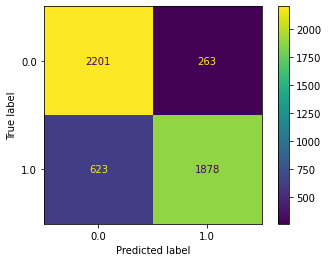

cout métier de l'algorithme Nearest Neighbors : 3253
_____________
Training model Gaussian Process


In [ ]:
for name_model, m in models.items():
    print(f"Training model {name_model}") 
    grid = GridSearchCV(m, {}, scoring=customer_cout_metier_scorer) 
    grid.fit(X_train, Y_train)
    print(grid.cv_results_)
    plot_confusion_matrix(grid.best_estimator_, X_test, Y_test)
    y_class=grid.predict(X_test) # A préciser, on prend son score ou sa valeur prédiction???
    plt.show()
    print(f"cout métier de l'algorithme {name_model} : {cout_metier(Y_test, y_class)}")
    print("_____________")


## Optimize best model

In [ ]:
Modèle retenu avec une fonction métier le plus bas est le naive Bayes

In [30]:
grid = GridSearchCV(best_model, {plage_hyperparametre}, scoring=customer_cout_metier_scorer) 
grid.fit(X_train, Y_train)

NameError: name 'best_model' is not defined

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve of model
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'grid' is not defined

## LIME - feature importance locale


In [ ]:
# tester l'importance locale et flobale d'un sample de test
# Les algos d'importance locale sont agnostiques ce qui signifie qu'ils peuvent se baser sur n'importe quel algorithme capable de faire des prédictions

# Algo d'importance localime_exp.show_in_notebook(show_table=Truele, LIME
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)


In [ ]:
test_1 = X_test.iloc[1]

lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=grid.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

## SHAP - feature importance globale

In [ ]:
# Algo d'importance globale, SHAP
shap.initjs()model

shap_explainer = shap.TreeExplainer(grid)
shap_values = shap_explainer.shap_values(X)

In [ ]:
shap.force_plot(shap_explainer.expected_value, shap_values[1, :], test_1)

In [ ]:
precision, recall, f_score, support =precision_recall_fscore_support(y_test, y_class)